In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import seaborn as sns
import re

In [2]:
uploaded = files.upload()

Saving vgames2.csv to vgames2.csv


## **1-1. 데이터 확인, EDA, 전처리**

---



In [ ]:
df_vg = pd.read_csv('vgames2.csv')
df_vg = df_vg.drop('Unnamed: 0', axis = 1)
df_vg

# Data Columns 설명 

Name - 게임이름

Platform - 게임 출시 플랫폼  (i.e. PC,PS4, etc.), object

Year - 게임 출시 년도, float

Genre - 게임 장르 ,object

Publisher - 게임 퍼블리셔, object

NA_Sales - 북미 출고량 (in millions), object

EU_Sales - 유럽 출고량 (in millions), object

JP_Sales - 일본 출고량 (in millions), object

Other_Sales - 기타 다른나라 출고량 (in millions), float


In [4]:
df_vg.isnull().sum()
# 결측치 Year = 271 , Genre 50, Publisher 58
#df_vg.info()
#NA_Sales, EU_Sales, JP_Sales, Other_Sales의 데이터 타입을 object >> float로 바꿔야 할듯

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [5]:
df_vg = df_vg.dropna(axis=0)

In [6]:
df_vg['NA_Sales'].value_counts() 
#df_vg['EU_Sales'].value_counts()
#df_vg['JP_Sales'].value_counts()
#df_vg['Other_Sales'].value_counts()
#df_vg['Year'].value_counts()

0       4367
0.02     524
0.03     518
0.01     516
0.04     515
        ... 
1.86       1
6.91       1
3.88       1
4.14       1
4.18       1
Name: NA_Sales, Length: 489, dtype: int64

Sales 값들에 M, K같은 영어들이 존재함으로, 단위를 하나로 통일 해야함 (million 으로 통일)

In [ ]:
def unit(x):
  if str(x).find('K') != -1:
    return float(str(x).split('K')[0].replace('.',''))*1000
  elif str(x).find('M') != -1:
    return float(str(x).split('M')[0].replace('.',''))*1000000
  else:
    return float(str(x).replace('.',''))*1000000

for col in ['NA_Sales','EU_Sales','JP_Sales','Other_Sales']:
  df_vg[col] = df_vg[col].apply(unit)
df_vg

Year 값들을 1980~ 2020 사이의 값들로 맞춰줌

In [ ]:
def yearcut(x):
  if (x >= 0) & (x < 20):
    return int(2000 + x)
  elif (x > 30) & (x < 1000):
    return int(1900 + x)
  else:
    return x

df_vg['Year'] = df_vg['Year'].apply(yearcut)
df_vg

In [9]:
df_vg.duplicated().sum()
# 중복값 0

0

# **1-2 Feature Engineering**

In [ ]:
df_vg['Total_Sales'] = df_vg['NA_Sales'] + df_vg['EU_Sales'] + df_vg['JP_Sales'] + df_vg['Other_Sales']
df_vg
# 전체 판매량 - Total Sales

시대별 변화량을 확인하기 위하여 Year를 5년단위로 묶어 'age' column을 추가했다.

In [ ]:
conditions = [df_vg['Year'] <= 1985,
              (df_vg['Year'] > 1985) & (df_vg['Year'] <= 1990),
              (df_vg['Year'] > 1990) & (df_vg['Year'] <= 1995),
              (df_vg['Year'] > 1995) & (df_vg['Year'] <= 2000),
              (df_vg['Year'] > 2000) & (df_vg['Year'] <= 2005),
              (df_vg['Year'] > 2005) & (df_vg['Year'] <= 2010),
              (df_vg['Year'] > 2010) & (df_vg['Year'] <= 2015),
              (df_vg['Year'] > 2015) & (df_vg['Year'] <= 2020)]
  
labels = ['1980~1985','1985~1990','1990~1995','1995~2000','2000~2005','2005~2010','2010~2015','2015~2020']
df_vg['age'] = np.select(conditions,labels)

우리는 이번 프로젝트를 진행하면서 3가지 질문에 답해야한다.

1. 지역에 따라서 선호하는 게임 장르가 다를까

2. 연도별 게임의 트렌드가 있을까

3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스

# **2-1. 지역에 따라서 선호하는 게임 장르가 다를까**

---



In [11]:
from scipy.stats import chi2_contingency

df_sub = df_vg[['Genre', 'Platform', 'Publisher','Total_Sales']].astype('category')

gen_sales = pd.crosstab(df_vg['Genre'], df_vg['Total_Sales'])


print('genre-sales',chi2_contingency(gen_sales)[1])

genre-sales 5.195620720963679e-12


p - value 값이 0.05 보다 작으므로, 출고량에 연관이 있다 볼 수있음

장르와 출고량 간에는 연관성이 있는 걸로 확인.

In [12]:
df_na = df_vg[['Genre', 'NA_Sales']].astype('category')
df_na = pd.crosstab(index = df_na['Genre'], columns = df_na['NA_Sales'])

df_eu = df_vg[['Genre', 'EU_Sales']].astype('category')
df_eu = pd.crosstab(index = df_eu['Genre'], columns = df_eu['EU_Sales'])

df_jp = df_vg[['Genre', 'JP_Sales']].astype('category')
df_jp = pd.crosstab(index = df_jp['Genre'], columns = df_jp['JP_Sales'])

df_oth = df_vg[['Genre', 'Other_Sales']].astype('category')
df_oth = pd.crosstab(index = df_oth['Genre'], columns = df_oth['Other_Sales'])

print('NA',chi2_contingency(df_na)[1])
print('EU',chi2_contingency(df_eu)[1])
print('JP',chi2_contingency(df_jp)[1])
print('Other',chi2_contingency(df_oth)[1])

NA 2.5991971892268574e-62
EU 1.274653827267299e-35
JP 2.413004081735147e-146
Other 1.9488489082353068e-18


모든 지역[NA, EU, JP, Other]에서 pvalue 값이 0.05 보다 작아 장르와 출고량간의 연관이 있다고 볼 수 있다. 즉 ,선호하는 장르가 있다고 볼 수 있다.

최근 10년에 대한 데이터를 확인하기위해 age를 2010~2020으로 묵어 DataFrame을 만들었다.

In [17]:
df5a = df_vg[df_vg['age'] == '2015~2020']
df5b = df_vg[df_vg['age'] == '2010~2015']
df10 = pd.concat([df5a,df5b])

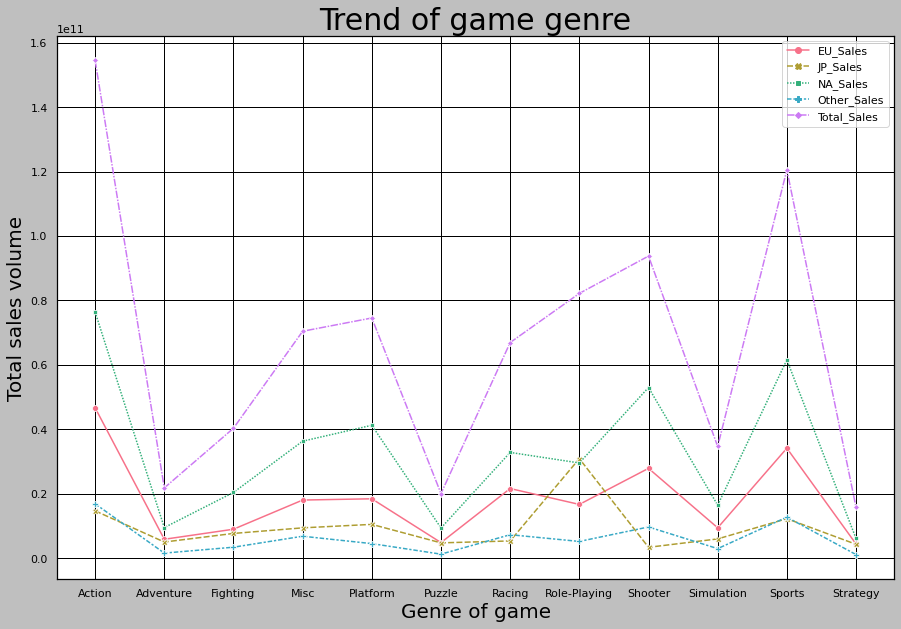

In [111]:
df_genre = df_vg.groupby(by=['Genre'])['Total_Sales'].sum() # 전 대륙 선호하는 게임 장르
df_genre = df_genre.reset_index()

df_genre_na = df_vg.groupby(by=['Genre'])['NA_Sales'].sum() # 북미 선호하는 게임 장르
df_genre_na = df_genre_na.reset_index()

df_genre_eu = df_vg.groupby(by=['Genre'])['EU_Sales'].sum() # 유럽 선호하는 게임 장르
df_genre_eu = df_genre_eu.reset_index()

df_genre_jp = df_vg.groupby(by=['Genre'])['JP_Sales'].sum() # 일본 선호하는 게임 장르
df_genre_jp = df_genre_jp.reset_index()

df_genre_ot = df_vg.groupby(by=['Genre'])['Other_Sales'].sum() # 외국 선호하는 게임 장르
df_genre_ot = df_genre_ot.reset_index()

df_na = df_genre.combine_first(df_genre_na)
df_na = df_na.set_index("Genre")

df_eu = df_genre.combine_first(df_genre_eu)
df_eu = df_eu.set_index("Genre")

df_jp = df_genre.combine_first(df_genre_jp)
df_jp = df_jp.set_index("Genre")

df_ot = df_genre.combine_first(df_genre_ot)
df_ot = df_ot.set_index("Genre")

df_genre_all = df_genre.combine_first(df_genre_na).combine_first(df_genre_eu).combine_first(df_genre_jp).combine_first(df_genre_ot)
df_genre_all = df_genre_all.set_index("Genre")

plt.style.use("grayscale")
plt.figure(figsize=(15, 10))
plt.xlabel("Genre of game", fontsize=20)
plt.ylabel("Total sales volume", fontsize=20)

sns.lineplot(data=df_genre_all, markers=True);

지난 게임 시장에서의 시장 점유율을 나타낸 것으로, 미국이 대부분의 시장에서 40% 이상을 점유 하고있으며, Role-Playing, Strategy 두 분야를 제외하고 많은 포션을 갖고 있는것으로 확인

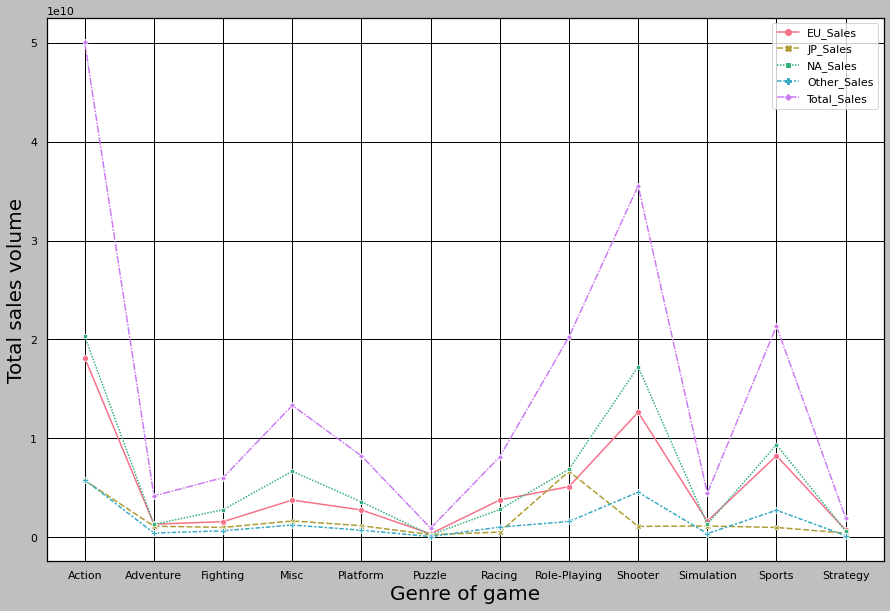

In [106]:
df10_genre = df10.groupby(by=['Genre'])['Total_Sales'].sum() # 전 대륙 선호하는 게임 장르
df10_genre = df10_genre.reset_index()

df10_genre_na = df10.groupby(by=['Genre'])['NA_Sales'].sum() # 북미 선호하는 게임 장르
df10_genre_na = df10_genre_na.reset_index()

df10_genre_eu = df10.groupby(by=['Genre'])['EU_Sales'].sum() # 유럽 선호하는 게임 장르
df10_genre_eu = df10_genre_eu.reset_index()

df10_genre_jp = df10.groupby(by=['Genre'])['JP_Sales'].sum() # 일본 선호하는 게임 장르
df10_genre_jp = df10_genre_jp.reset_index()

df10_genre_ot = df10.groupby(by=['Genre'])['Other_Sales'].sum() # 외국 선호하는 게임 장르
df10_genre_ot = df10_genre_ot.reset_index()

df10_genre_all = df10_genre.combine_first(df10_genre_na).combine_first(df10_genre_eu).combine_first(df10_genre_jp).combine_first(df10_genre_ot)
df10_genre_all = df10_genre_all.set_index("Genre")
plt.style.use("grayscale")
plt.figure(figsize=(15, 10))
plt.xlabel("Genre of game", fontsize=20)
plt.ylabel("Total sales volume", fontsize=20)

sns.lineplot(data=df10_genre_all, markers=True);

최근 10년의 게임 장르의 산업 이다. 상대적으로 스포츠 장르가 감소하고 슈터 장르가 증가한것으로 보인다. 하지만 이에도 나와있듯이 일본은 Role-playing 에는 높은 점유율을 보이고있따.

In [130]:
na_rate = df_na['NA_Sales'] / df_na['Total_Sales'] * 100
eu_rate = df_eu['EU_Sales'] / df_eu['Total_Sales'] * 100
jp_rate = df_jp['JP_Sales'] / df_jp['Total_Sales'] * 100
ot_rate = df_ot['Other_Sales'] / df_ot['Total_Sales'] * 100

In [25]:
pd.concat([na_rate, eu_rate,jp_rate, ot_rate], axis =1)

,0,1,2,3
Genre,,,,
Action,49.426867,30.191309,9.482698,10.899126
Adventure,43.445853,26.736143,22.804219,7.013786
Fighting,50.528693,22.193400,18.944541,8.333366
Misc,51.524604,25.563865,13.304736,9.606795
Platform,55.302156,24.679706,14.018230,5.999907
Puzzle,46.578492,23.926180,23.506353,5.988975
Racing,49.011549,32.247378,7.921510,10.819564
Role-Playing,35.919778,20.252003,37.559821,6.268398
Shooter,56.468976,29.700977,3.549441,10.280606


In [23]:
na_rate.mean() # 47.9 %
#eu_rate.mean() # 26.5%
#jp_rate.mean() # 17.11%
#ot_rate.mean() #8.41 %

47.929691241966985

총합의 양과 각 나라의 출고량은 비슷한양상을 보이지만
일본은 롤플레잉에 높은 수치을 보이고 있다.



In [22]:
group = df_vg.groupby('Genre')
f_exp_G = [group['Total_Sales'].sum()[x]/(group['Total_Sales'].sum()).sum() for x in range(0,len(group))] # 전세계(Global)출고량중 장르별 출고량 비율
f_exp_JP = [group['JP_Sales'].sum()[x]/(group['JP_Sales'].sum()).sum() for x in range(0,len(group))] # 북미(NA)출고량중 장르별 출고량 비율


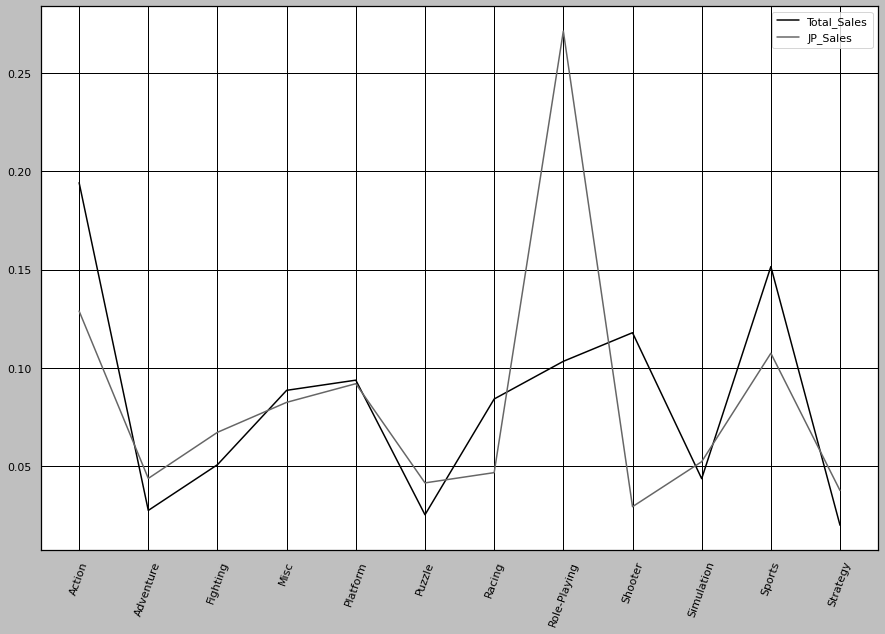

In [112]:
plt.figure(figsize=(15,10))
plt.plot(f_exp_G,label='Total_Sales')
plt.plot(f_exp_JP,label='JP_Sales')
plt.legend()
x = range(0,12)
labels = ['Action','Adventure','Fighting','Misc','Platform','Puzzle','Racing','Role-Playing','Shooter','Simulation','Sports','Strategy']
plt.xticks(x,labels,rotation = 70)
plt.show()

# **나라별 선호하는 장르가 다르고, 그 비율 역시 다르다는 것을 확인**

# **2-2연도별 게임의 트렌드가 있을까**

---



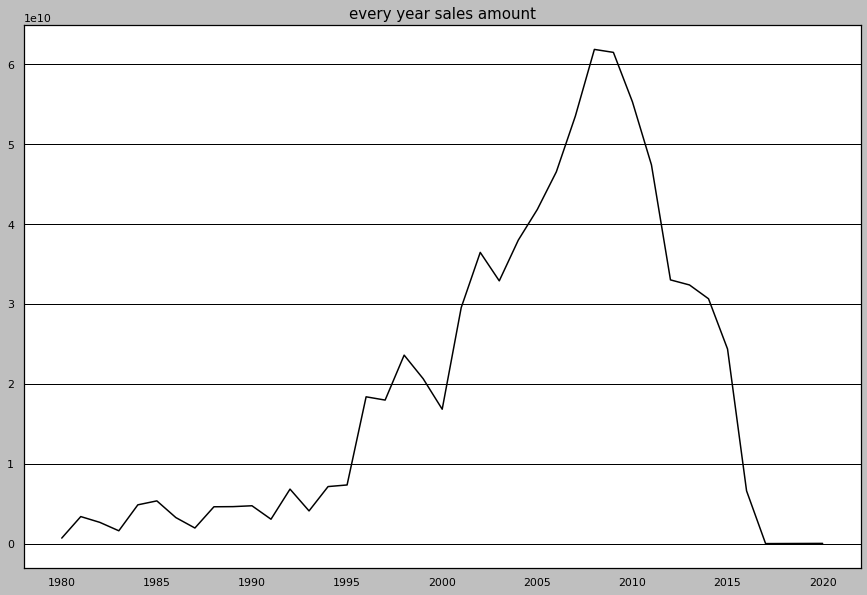

In [100]:
plt.figure(figsize=(15,10))
plt.plot(df_vg.groupby('Year')['Total_Sales'].sum())
plt.style.use("grayscale")
plt.title(str("every year sales amount"),fontsize=15)
plt.grid(axis='x')
plt.show()

총 게임 시장 출고량 그래프

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]), <a list of 39 Text major ticklabel objects>)

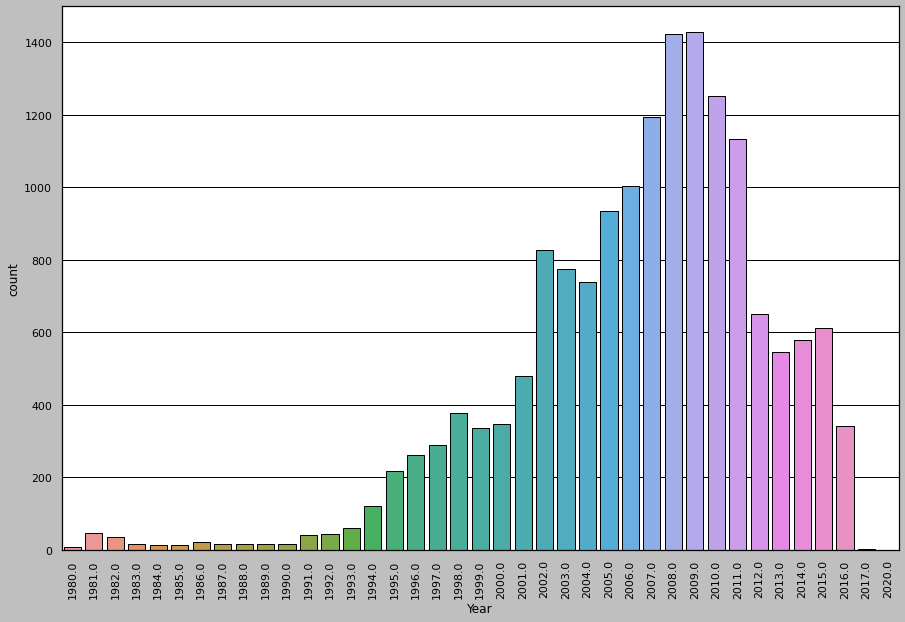

In [99]:
plt.figure(figsize=(15,10))
plt.style.use("grayscale")
sns.countplot(x = df_vg['Year'], data = df_vg)
plt.xticks(rotation=90)

게임 발매량 누적 그래프

1980년-1995년: (시장창출) 비디오 게임의 시장이 형성되며, 새로운 시장의 형성으로 높은 가격을 기대하기 힘들다,

1995년-2010년: (성장) 출고량이 급격하게 증가하며, 비디오 게임 시장에 과공급

2010년-2015년: (적정) 본격적인 성장세를 보여주고 있다.


In [29]:
df_genre_region = df10.groupby(['Genre'])['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'].sum()
df_genre_region.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,2.032956e+10,1.813894e+10,5.751510e+09,5.806080e+09
Adventure,1.308000e+09,1.324050e+09,1.122050e+09,4.300000e+08
Fighting,2.793470e+09,1.579040e+09,9.981800e+08,6.590000e+08
Misc,6.672000e+09,3.765130e+09,1.653000e+09,1.239010e+09
Platform,3.579000e+09,2.758920e+09,1.171000e+09,7.180800e+08


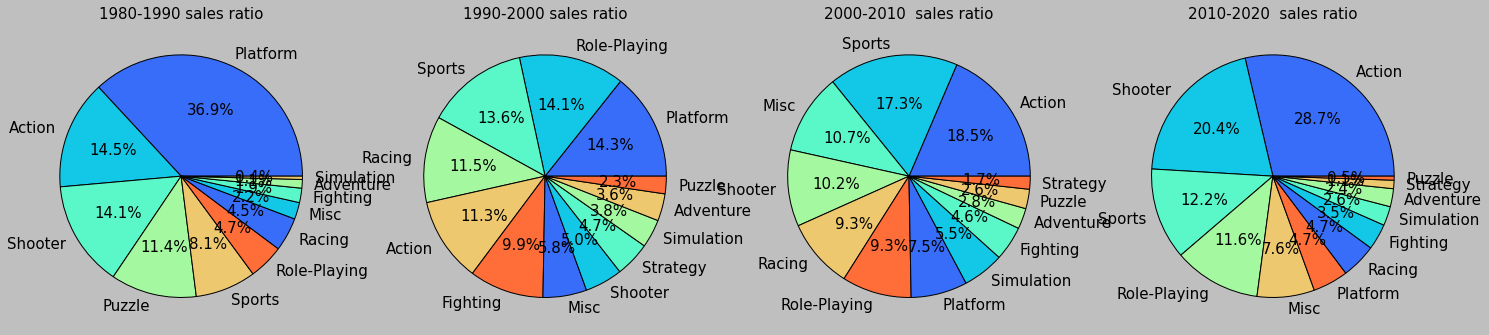

In [102]:
fig, ax = plt.subplots(1, 4, figsize = (25,25))
# 1980-1990장르별 출고량
ratio1980 = df_vg[df_vg['Year'] <= 1990].groupby('Genre')['Total_Sales'].sum().sort_values(ascending=False)
labels1980 = ratio1980.index
ax[0].pie(ratio1980,labels =labels1980, autopct='%.1f%%',textprops={'fontsize': 15})
ax[0].set_title('1980-1990 sales ratio',fontsize = 15)

# 1990-2000 장르별 출고량
ratio1990 = df_vg[(df_vg['Year'] > 1990)&(df_vg['Year'] <= 2000)].groupby('Genre')['Total_Sales'].sum().sort_values(ascending=False)
labels1990 = ratio1990.index
ax[1].pie(ratio1990,labels =labels1990, autopct='%.1f%%',textprops={'fontsize': 15})
ax[1].set_title('1990-2000 sales ratio',fontsize = 15)

# 2000-2010 장르별 출고량 비율
ratio2000 = df_vg[(df_vg['Year'] > 2000)&(df_vg['Year'] <= 2010)].groupby('Genre')['Total_Sales'].sum().sort_values(ascending=False)
labels2000 = ratio2000.index
ax[2].pie(ratio2000,labels =labels2000, autopct='%.1f%%',textprops={'fontsize': 15})
ax[2].set_title('2000-2010  sales ratio',fontsize = 15)

# 2010-2020 장르별 출고량 비율
ratio2010 = df_vg[(df_vg['Year'] > 2010)&(df_vg['Year'] <= 2020)].groupby('Genre')['Total_Sales'].sum().sort_values(ascending=False)
labels2010 = ratio2010.index
ax[3].pie(ratio2010,labels =labels2010, autopct='%.1f%%',textprops={'fontsize': 15})
ax[3].set_title('2010-2020  sales ratio',fontsize = 15)

plt.show()

처음 80~ 95년대에는 플랫폼 장르의 선호도가 높다. 하지만 이후 ‘액션’, ‘스포츠’의 비율이 높아지고, 2015년 이후
 ‘슈터’의 비율이 상승하는 추세


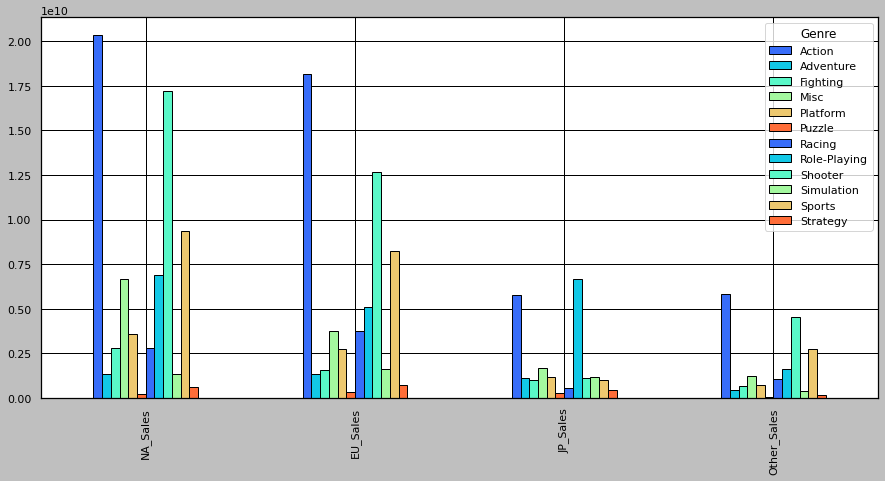

In [101]:
sns.set_palette('rainbow')
df_genre_region.T.plot.bar(figsize=(15,7))

최근 10년에는 기존에 강세였던 플랫폼과, 레이싱 장르와 다르게  액션에 비율이 높게 나타났으며, 일본을 제외하고 ‘스포츠’와 ‘슈터’의 비율도 높게 나타남. 하지만 일본에서는 ‘시뮬레이션’ 장르가 최고 높게 나타남

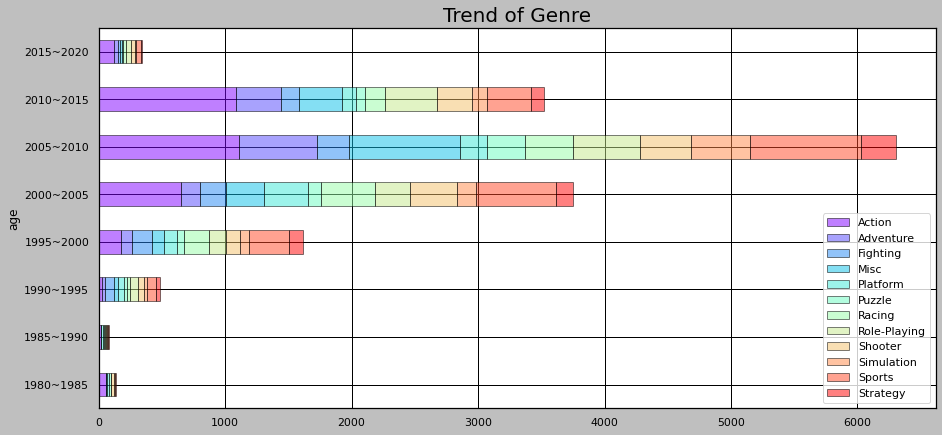

In [103]:
df_period.plot(kind='barh', stacked=True, figsize=(15, 7), cmap='rainbow', alpha=0.5 )
plt.title('Trend of Genre', fontsize=20)
plt.legend(loc='best')

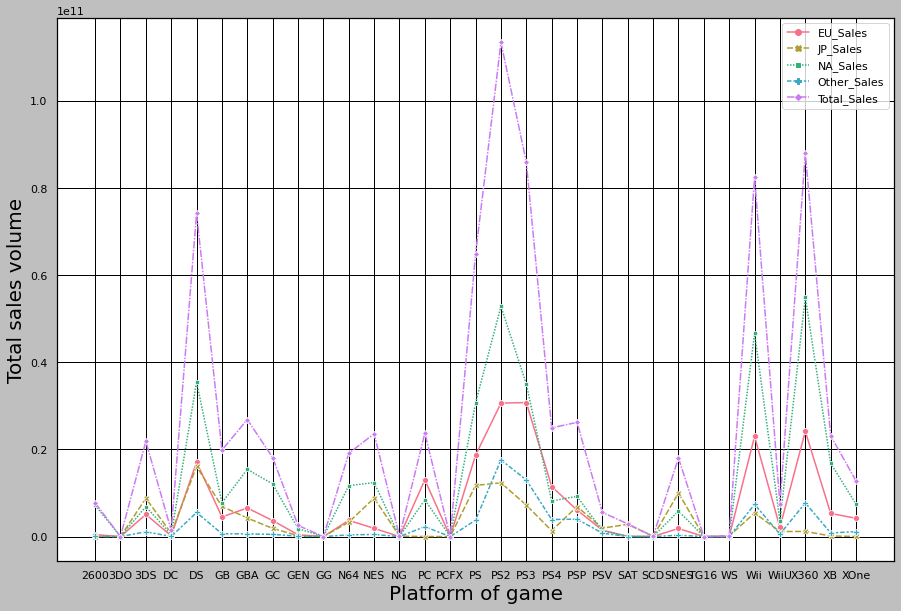

In [108]:
df_Platform = df_vg.groupby(by=['Platform'])['Total_Sales'].sum() # 전 대륙 선호하는 게임 플랫폼
df_Platform = df_Platform.reset_index()

df_Platform_na = df_vg.groupby(by=['Platform'])['NA_Sales'].sum() # 북미 선호하는 게임 플랫폼
df_Platform_na = df_Platform_na.reset_index()

df_Platform_eu = df_vg.groupby(by=['Platform'])['EU_Sales'].sum() # 유럽 선호하는 게임 플랫폼
df_Platform_eu = df_Platform_eu.reset_index()

df_Platform_jp = df_vg.groupby(by=['Platform'])['JP_Sales'].sum() # 일본 선호하는 게임 플랫폼
df_Platform_jp = df_Platform_jp.reset_index()

df_Platform_ot = df_vg.groupby(by=['Platform'])['Other_Sales'].sum() # 외국 선호하는 게임 ㅍ
df_Platform_ot = df_Platform_ot.reset_index()


df_Platform_all = df_Platform.combine_first(df_Platform_na).combine_first(df_Platform_eu).combine_first(df_Platform_jp).combine_first(df_Platform_ot)
df_Platform_all = df_Platform_all.set_index("Platform")

plt.style.use("grayscale")
plt.figure(figsize=(15, 10))
plt.xlabel("Platform of game", fontsize=20)
plt.ylabel("Total sales volume", fontsize=20)

sns.lineplot(data=df_Platform_all, markers=True);

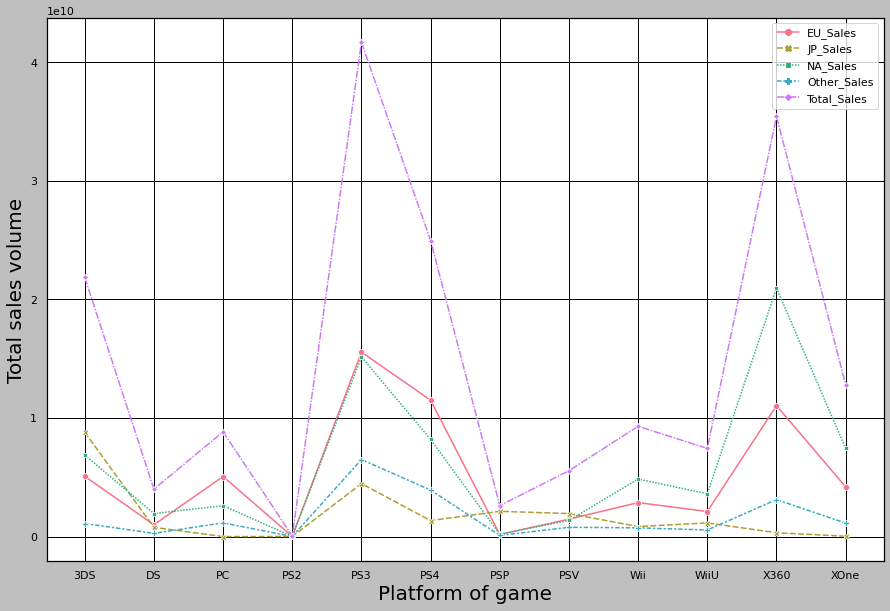

In [110]:
df10_Platform = df10.groupby(by=['Platform'])['Total_Sales'].sum() # 전 대륙 선호하는 게임 장르
df10_Platform = df10_Platform.reset_index()

df10_Platform_na = df10.groupby(by=['Platform'])['NA_Sales'].sum() # 북미 선호하는 게임 장르
df10_Platform_na = df10_Platform_na.reset_index()

df10_Platform_eu = df10.groupby(by=['Platform'])['EU_Sales'].sum() # 유럽 선호하는 게임 장르
df10_Platform_eu = df10_Platform_eu.reset_index()

df10_Platform_jp = df10.groupby(by=['Platform'])['JP_Sales'].sum() # 일본 선호하는 게임 장르
df10_Platform_jp = df10_Platform_jp.reset_index()

df10_Platform_ot = df10.groupby(by=['Platform'])['Other_Sales'].sum() # 외국 선호하는 게임 장르
df10_Platform_ot = df10_Platform_ot.reset_index()

df10_Platform_all = df10_Platform.combine_first(df10_Platform_na).combine_first(df10_Platform_eu).combine_first(df10_Platform_jp).combine_first(df10_Platform_ot)
df10_Platform_all = df10_Platform_all.set_index("Platform")

plt.style.use("grayscale")
plt.figure(figsize=(15, 10))
plt.xlabel("Platform of game", fontsize=20)
plt.ylabel("Total sales volume", fontsize=20)

sns.lineplot(data=df10_Platform_all, markers=True);

# **플랫폼 수의 감소와 높은 점유율**
전체 플랫폼 그래프에서 최근 10년 플랫폼의 변화로 살펴보았을 때, 30여개의 플랫폼에서 현재 약 12개 정 도로 감소되었고, PS, X360등의 플랫폼이 높은 점유율을 보이고 있음. 

플랫폼간 트렌드로 발매 격차가 일어나고 있음


In [32]:
df_period = df_vg.groupby(['age', 'Genre'])['Genre'].count().unstack()
df_period = df_period.fillna(0)
df_period.head()

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
age,,,,,,,,,,,,
1980~1985,54.0,1.0,2.0,7.0,18.0,13.0,6.0,0.0,22.0,2.0,10.0,0.0
1985~1990,15.0,1.0,2.0,1.0,18.0,8.0,4.0,11.0,8.0,2.0,15.0,0.0
1990~1995,24.0,24.0,70.0,34.0,47.0,27.0,25.0,60.0,48.0,25.0,71.0,29.0
1995~2000,177.0,89.0,152.0,101.0,99.0,54.0,197.0,138.0,109.0,75.0,311.0,110.0
2000~2005,652.0,153.0,198.0,301.0,355.0,99.0,430.0,274.0,371.0,147.0,634.0,140.0


In [36]:
fill_Gen = df_vg[(df_vg['Year'] >2005) & (df_vg['Year'] < 2020)]
Year_Gen = pd.crosstab(fill_Gen.Year,fill_Gen.Genre)

In [39]:
Year_Gen_T = Year_Gen.T
Year_Gen_mean = Year_Gen_T.mean(axis=1)
Year_Gen_T['mean'] = Year_Gen_mean
Year_Gen_T =Year_Gen_T.sort_values(by = 'mean', ascending=False)
Year_Gen = Year_Gen_T.T
Year_Gen = Year_Gen.drop(index = 'mean')
Year_Gen

Genre,Action,Sports,Misc,Adventure,Role-Playing,Shooter,Simulation,Racing,Fighting,Strategy,Puzzle,Platform
Year,,,,,,,,,,,,
2006.0,184.0,138.0,109.0,71.0,108.0,69.0,58.0,75.0,55.0,42.0,42.0,54.0
2007.0,210.0,167.0,150.0,84.0,103.0,84.0,90.0,84.0,50.0,66.0,65.0,42.0
2008.0,219.0,200.0,210.0,166.0,112.0,83.0,118.0,82.0,57.0,50.0,64.0,62.0
2009.0,271.0,184.0,207.0,141.0,103.0,91.0,123.0,83.0,53.0,65.0,79.0,28.0
2010.0,226.0,185.0,200.0,153.0,103.0,81.0,79.0,57.0,40.0,53.0,45.0,31.0
2011.0,239.0,122.0,183.0,107.0,95.0,94.0,55.0,64.0,49.0,45.0,43.0,37.0
2012.0,263.0,54.0,38.0,57.0,78.0,48.0,18.0,30.0,29.0,15.0,11.0,11.0
2013.0,148.0,53.0,42.0,60.0,70.0,59.0,18.0,16.0,20.0,19.0,3.0,37.0
2014.0,186.0,55.0,41.0,75.0,90.0,47.0,11.0,27.0,23.0,8.0,7.0,10.0


각장르별 발매량을 표로 나타낸 것으로, 상대적으로 봤을때 최근에 슈터의 비중이 많이 늘어남

# **2-3출고량이 높은 게임에 대한 분석 및 시각화 프로세스**

---



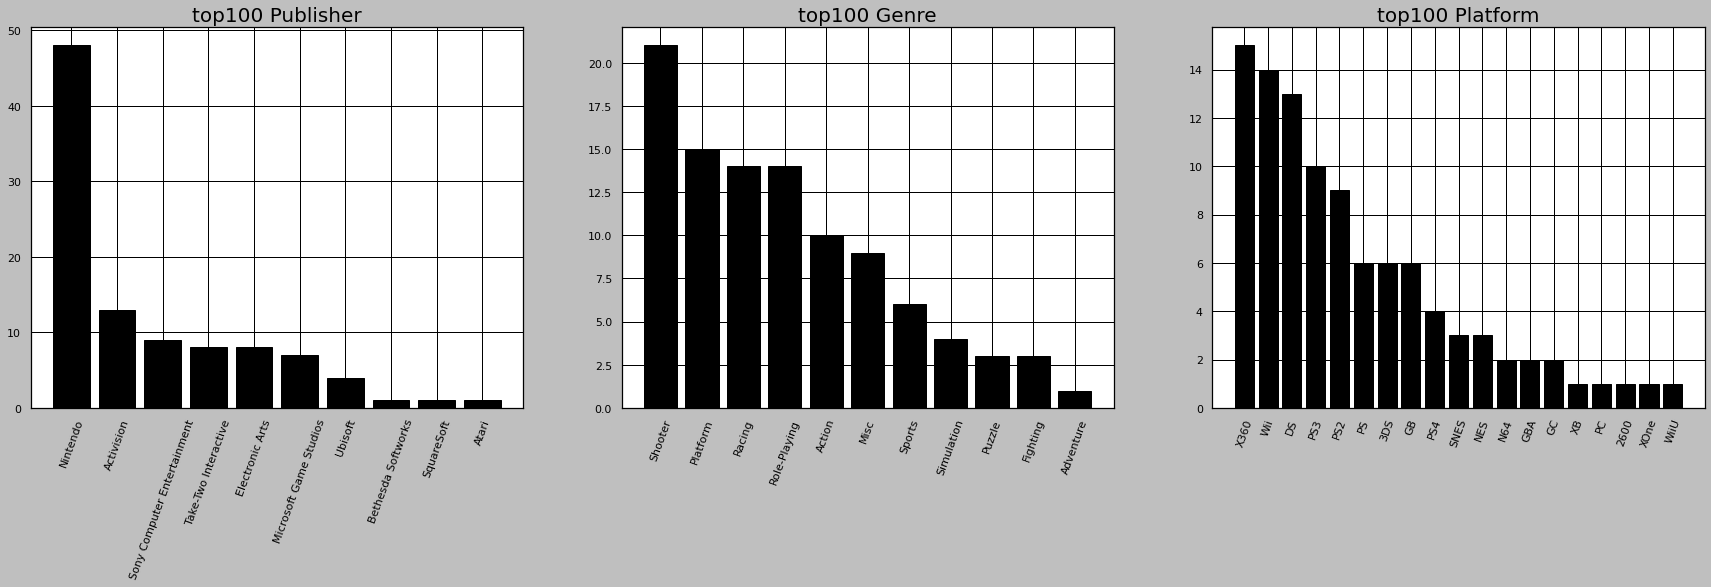

In [98]:
top100 = df_vg.nlargest(100,columns='Total_Sales')
plt.style.use("grayscale")
fig, ax = plt.subplots(1, 3, figsize = (30,7))
ax[0].bar(top100['Publisher'].value_counts().index,top100['Publisher'].value_counts())
ax[0].set_title('top100 Publisher',fontsize=20)
ax[1].bar(top100['Genre'].value_counts().index,top100['Genre'].value_counts())
ax[1].set_title('top100 Genre',fontsize=20)
ax[2].bar(top100['Platform'].value_counts().index,top100['Platform'].value_counts())
ax[2].set_title('top100 Platform',fontsize=20)

for i in range(0,3):
  ax[i].xaxis.set_tick_params(rotation=70)

plt.show()

# **출고량이 높은 게임의 특징**
# **장르 / 플랫폼 / 퍼블리셔**

# **각축전의 게임 장르**

점유율이 극히낮은 Advanture와 ‘’를 제외하고 슈팅에서 가장 높은 점유율을 보이고있으며, 슈팅 플랫폼 레이싱, 롤플레잉 게임들이 주로 크게 성공한 것을 확인 할 수 있다.

# **플랫폼 수 감소와  높은 점유율**

상위 100개 게임의 플랫폼 수를 본다면 상위 5개 플랫폼[X360,Wii, DS, PS3, PS2]을 사용한 게임들이 50 프로 이상을 점유하고 있다. 더불어 Wii와 DS 그리고 PS 시리즈들을 통합한다면 3개의 게임사가 과반수를 점유 하고있는 형태이다.

# **게임 흥행 보증 수표 닌텐도**

상위 100개의 게임의 퍼블리셔 중 출고량이 100위안에 든 게임의 45%이상을 닌텐도가 발매했다. 뒤이어 나머지 비율을 액티비전, 소니등 다양한 게임사들의 경쟁 구도의 형성으로 보여진다.




---



In [123]:
Publisher_1 = df_vg['Publisher'].value_counts()
Publisher_2 =df_vg.groupby('Publisher')['Total_Sales'].sum()
perca = pd.concat([Publisher_1,Publisher_2], axis = 1)
perca['game/money'] = perca['Total_Sales'] / perca['Publisher']
# 퍼블리셔 별 게임당 출고량

In [124]:
Publisher10 = df10['Platform'].value_counts()
Publisher_10 =df10.groupby('Platform')['Total_Sales'].sum()
perc10 = pd.concat([Publisher10,Publisher_10], axis = 1)
perc10['game/money'] = perc10['Total_Sales'] / perc10['Platform']
# 최근 10년 퍼블리셔 별 게임당 출고량

In [125]:
Platform_1 = df_vg['Platform'].value_counts()
Platform_2 = df_vg.groupby('Platform')['Total_Sales'].sum()
perc = pd.concat([Platform_1,Platform_2], axis = 1)
perc['game/money'] = perc['Total_Sales'] / perc['Platform']
# 플랫폼 별 게임당 출고량

In [126]:
Genre_1 = df_vg['Genre'].value_counts()
Genre_2 =df_vg.groupby('Genre')['Total_Sales'].sum()
per = pd.concat([Genre_1,Genre_2], axis = 1)
per['game/money'] = per['Total_Sales'] / per['Genre']
# 장르 별 게임당 출고량

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text major ticklabel objects>)

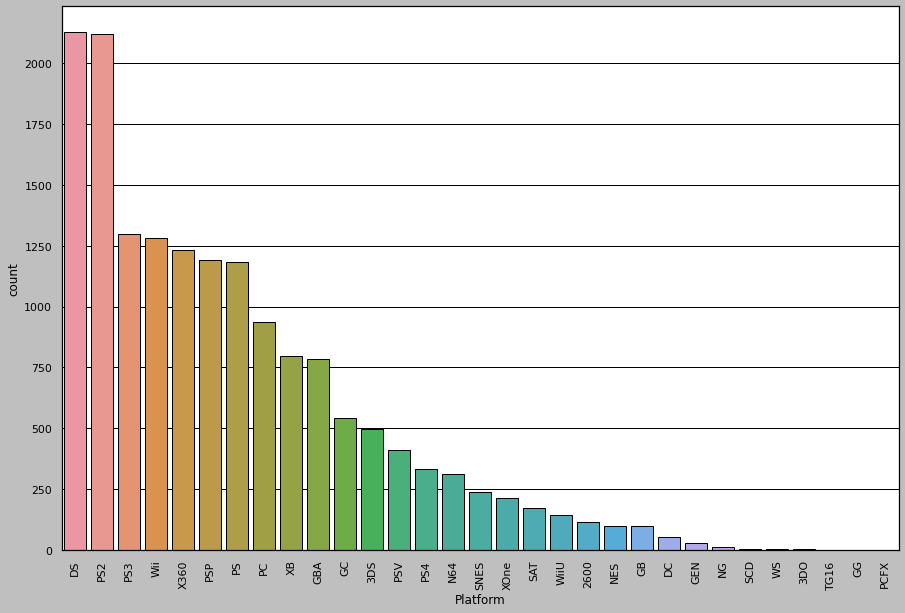

In [127]:
plt.figure(figsize=(15, 10))
sns.countplot(x="Platform", data=df_vg, order = df_vg['Platform'].value_counts().index)
plt.xticks(rotation=90)
# 플랫폼 별 게임 발매량

여기서 얻고 싶은 인사이트 - 플랫폼 / 장르 / 발매사 각 column별 게임 발매시 평균 출고량을 얻고, 더 많은 시장을 점유하고 있는 쪽으로 움직이기

# **PPT 발표 하기**

---

제목 [데이터가 말하는 다음분기 우리의 게임 설계는?]

목차
{데이터 소개와 프로젝트목적}
{시장분석}
{설계 전략}

// 데이터 소개 : 데이터 수, 플랫폼, 발매사, 국가 등
   프로젝트 목적: 설계방향 제시, 시장 진출

// 시장현황 전체 시장 [출고량 그래프 , 판매 액 그래프]

// 전체 시장 미국 유럽 점유율 [미국, 유럽 점유율 표]

// 변화하는 게임시장 [장르, 플랫폼 - 전체, 10년단위]

// 지역별 선호하는 게임 장르 

//플랫폼별 판매율 [전략화 필요성]

//플랫폼별 출고량 비율

이러한 시장에 우리는 어떠한 것들을 공략해 나가야할까.
2가지 방향성

//출고량이 높은 게임 특징 3 = 장르, 플랫폼, 게임사

//이러한 시장에 우리는 어떠한 것들을 공략해 나가야할까.
#  = 2가지 방향성 - **콜라보, 고객 세분화**
case 1. 각 장르별 유망 회사의 시장 점유율과 각 장르별 많이 쓰이는 플랫폼 

case 2-1.미국시장 분석 [미국에서 선호되는 장르 / 플랫폼 / 평균 판매액 ]

case 2-2. 일본 시장 분석 [미국에서 선호되는 장르 / 플랫폼 /평균 판매액 ]





(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

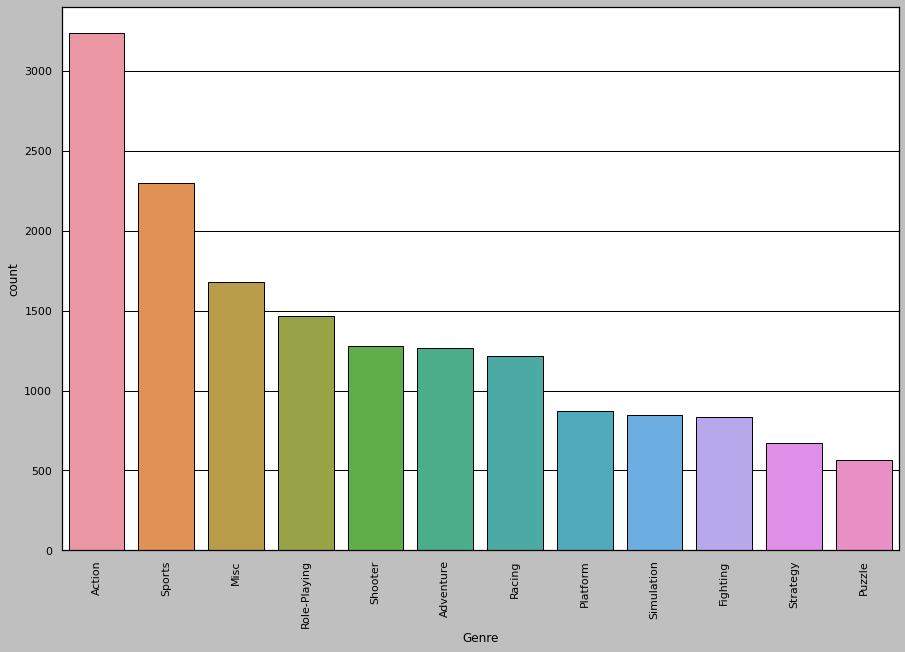

In [114]:
# 장르별 발매 게임수
plt.figure(figsize=(15, 10))
sns.countplot(x="Genre", data=df_vg, order = df_vg['Genre'].value_counts().index)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

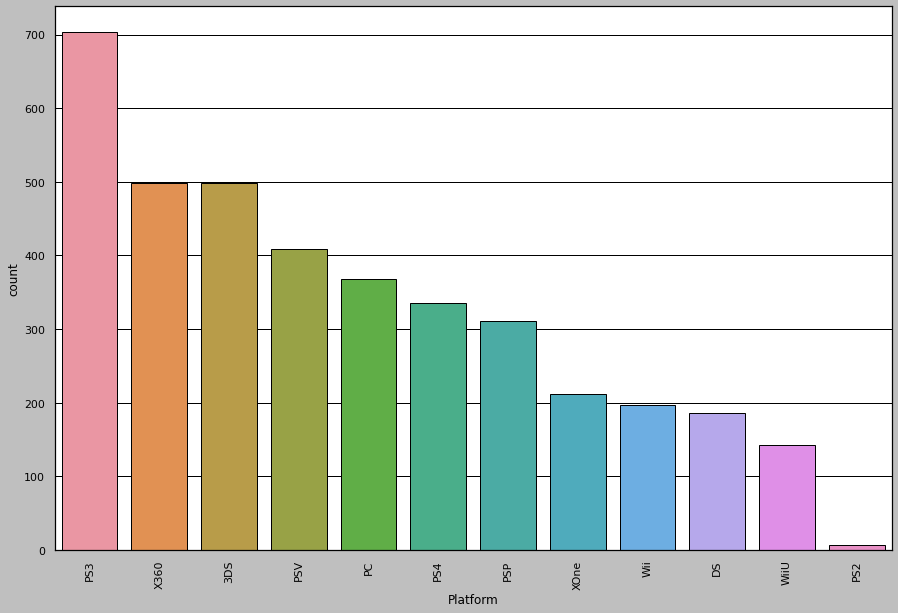

In [115]:
# 플랫폼별 최근 10년 발매 게임수
plt.figure(figsize=(15, 10))
sns.countplot(x="Platform", data=df10, order = df10['Platform'].value_counts().index)
plt.xticks(rotation=90)

In [55]:
af = df_vg['Publisher'].value_counts()
aff =df_vg.groupby('Publisher')['Total_Sales'].sum()
perca = pd.concat([af,aff], axis = 1)
perca['game/money'] = perca['Total_Sales'] / perca['Publisher']

In [56]:
# 장르별 많이 시장점유율이 높은 퍼블리셔를 얻기위한 조합식
a1 = df_vg[df_vg['Genre'] == 'Action']
a11 = a1['Publisher'].value_counts()
a12 = a1.groupby('Publisher')['Total_Sales'].sum()
a13 = pd.concat([a11,a12], axis = 1)
a13['over'] = a13['Total_Sales'] / a13['Publisher']

b1 = df_vg[df_vg['Genre'] == 'Sports']
b11 = b1['Publisher'].value_counts()
b12 = b1.groupby('Publisher')['Total_Sales'].sum()
b13 = pd.concat([b11,b12], axis = 1)
b13['over'] = b13['Total_Sales'] / b13['Publisher']

c1 = df_vg[df_vg['Genre'] == 'Misc']
c11 = c1['Publisher'].value_counts()
c12 = c1.groupby('Publisher')['Total_Sales'].sum()
c13 = pd.concat([c11,c12], axis = 1)


d1 = df_vg[df_vg['Genre'] == 'Role-Playing']
d11 = d1['Publisher'].value_counts()
d12 = d1.groupby('Publisher')['Total_Sales'].sum()
d13 = pd.concat([d11,d12], axis = 1)


e1 = df_vg[df_vg['Genre'] == 'Shooter']
e11 = e1['Publisher'].value_counts()
e12 = e1.groupby('Publisher')['Total_Sales'].sum()
e13 = pd.concat([e11,e12], axis = 1)


f1 = df_vg[df_vg['Genre'] == 'Racing']
f11 = f1['Publisher'].value_counts()
f12 = f1.groupby('Publisher')['Total_Sales'].sum()
f13 = pd.concat([f11,f12], axis = 1)


g1 = df_vg[df_vg['Genre'] == 'Platform']
g11 = g1['Publisher'].value_counts()
g12 = g1.groupby('Publisher')['Total_Sales'].sum()
g13 = pd.concat([g11,g12], axis = 1)


h1 = df_vg[df_vg['Genre'] == 'Fighting']
h11 = h1['Publisher'].value_counts()
h12 = h1.groupby('Publisher')['Total_Sales'].sum()
h13 = pd.concat([h11,h12], axis = 1)


i1 = df_vg[df_vg['Genre'] == 'Simulation']
i11 = i1['Publisher'].value_counts()
i12 = i1.groupby('Publisher')['Total_Sales'].sum()
i13 = pd.concat([i11,i12], axis = 1)


In [57]:
i13['Total_Sales'].sort_values()

Imagineer                       1.600000e+05
UIG Entertainment               1.000000e+06
Blue Byte                       1.000000e+06
Masque Publishing               1.000000e+06
CDV Software Entertainment      1.000000e+06
                                    ...     
505 Games                       1.770610e+09
Konami Digital Entertainment    3.039000e+09
Ubisoft                         3.940010e+09
Nintendo                        7.104000e+09
Electronic Arts                 8.415360e+09
Name: Total_Sales, Length: 149, dtype: float64

In [58]:
i13.loc['Ubisoft','Total_Sales'] / a13['Total_Sales'].sum() * 100

2.5497502577732725

In [59]:
a13.loc['Take-Two Interactive','over'] / a13['over'].mean() * 100

747.322864807023

In [ ]:
pip install squarify

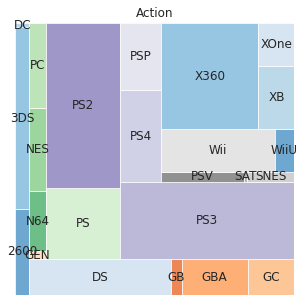

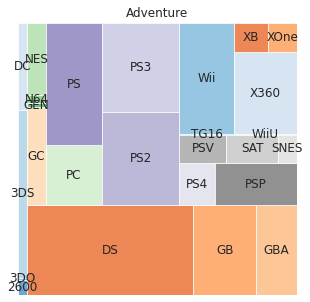

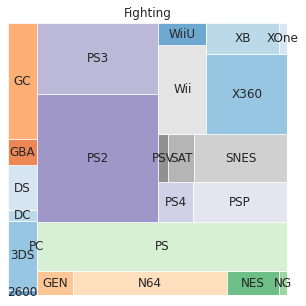

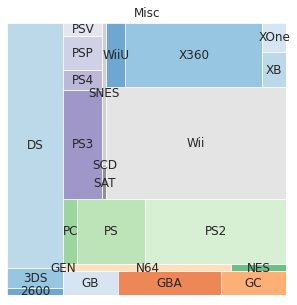

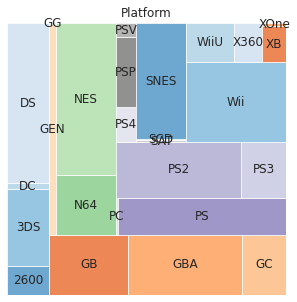

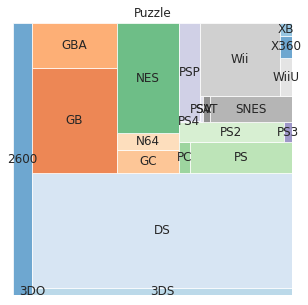

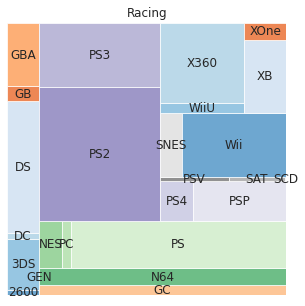

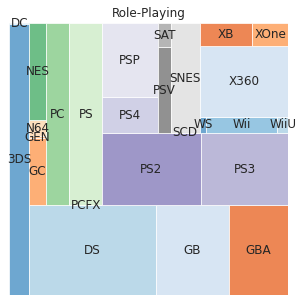

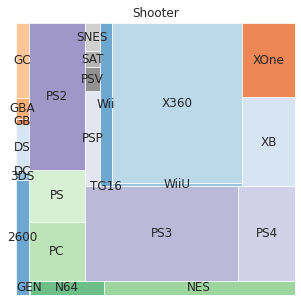

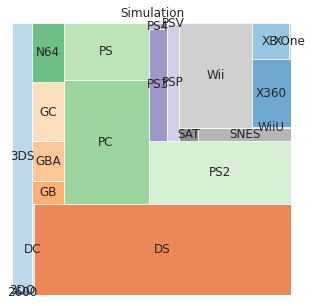

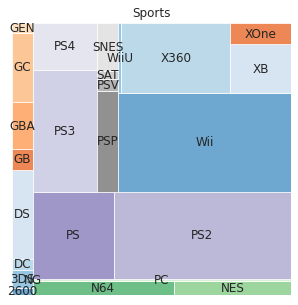

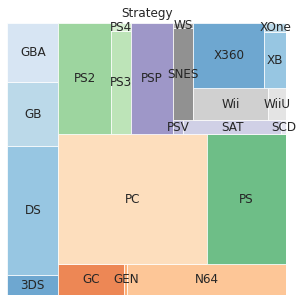

In [ ]:
# 장르별 많이 쓰이는 플랫폼의 인사이트를 얻기위한 그래프
df_genre_platform = df_vg.groupby(['Genre', 'Platform'])['Total_Sales'].sum().reset_index()
df_genre_platform.head()

import squarify 

genre = df_genre_platform['Genre'].unique()

for i in range(len(genre)):
    df_treemap = df_genre_platform[df_genre_platform['Genre'] == genre[i]]
    plt.rcParams['figure.figsize'] = (5, 5)
    squarify.plot(sizes=df_treemap['Total_Sales'], label=df_treemap['Platform'], alpha=.7, color=plt.cm.tab20c.colors )
    plt.title(genre[i])
    plt.axis('off')
    plt.show()

In [ ]:
Genre_filter = (df_vg['Genre'] == 'Role-Playing') & (df_vg['Year'] > 2010) # 조건식 작성 롤플레잉장르의 최근 10년 출고량
df_role = df_vg.loc[Genre_filter].reset_index(drop = True)
df_role

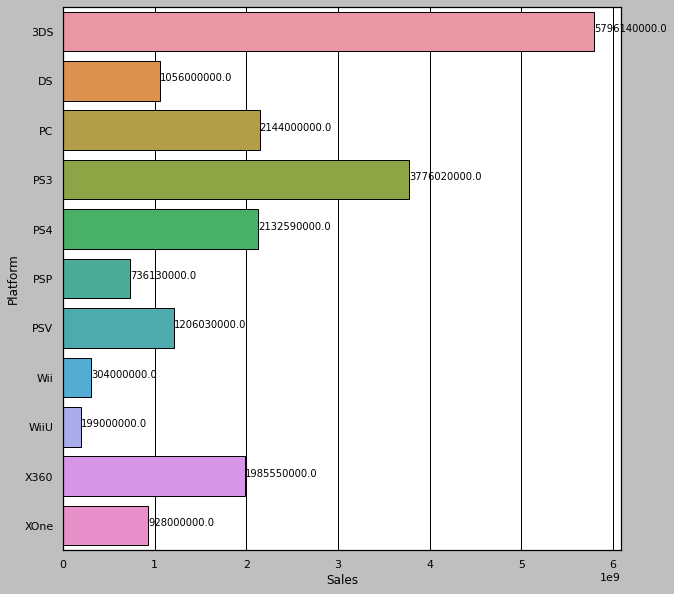

In [119]:
# 롤플레잉장르의 최근 10년 출고량
df_role_platform = df_role.groupby(['Platform'])['Total_Sales'].sum().reset_index()
platform = df_role_platform['Platform'].values
plt.figure(figsize=(10, 10))
df_shooter_platform_sales = sns.barplot(x ='Total_Sales', y='Platform', data=df_role_platform)
cnt = 0
for value in df_role_platform['Total_Sales']:
    df_shooter_platform_sales.text(x=value + 5, y=cnt, s=str(round(value,2)),
            color='black', size=10)
    cnt+=1
plt.xlabel('Sales')
plt.ylabel('Platform')
plt.show()

In [76]:
Genre_filter = (df_vg['Genre'] == 'Action') & (df_vg['Year'] > 2010) # 조건식 작성 10년 액션장르의 플랫폼별 출고량
df_action = df_vg.loc[Genre_filter].reset_index(drop = True)
df_action

Genre_filter = (df_vg['Genre'] == 'Shooter') & (df_vg['Year'] > 2010) # 조건식 작성 10년 슈터장르의 플랫폼별 출고량
df_shooter = df_vg.loc[Genre_filter].reset_index(drop = True)
df_shooter

Genre_filter = (df_vg['Genre'] == 'Sports') & (df_vg['Year'] > 2010) # 조건식 작성 10년 스포츠장르의 플랫폼별 출고량
df_sports = df_vg.loc[Genre_filter].reset_index(drop = True)
df_sports

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,age
0,Hajime no Ippo: The Fighting! (2014),PS3,2014.0,Sports,Namco Bandai Games,0.0,0.0,3000000.0,0.0,3000000.0,2010~2015
1,Don Bradman Cricket 14,X360,2014.0,Sports,Tru Blu Entertainment,0.0,1000000.0,0.0,0.0,1000000.0,2010~2015
2,Jikkyou Powerful Pro Baseball 2016,PS4,2016.0,Sports,Konami Digital Entertainment,0.0,0.0,17000000.0,0.0,17000000.0,2015~2020
3,FIFA Manager 12,PC,2011.0,Sports,Electronic Arts,0.0,3000000.0,0.0,1000000.0,4000000.0,2010~2015
4,Jikkyou Powerful Pro Yakyuu 2011 Ketteiban,PSP,2011.0,Sports,Konami Digital Entertainment,0.0,0.0,13000000.0,0.0,13000000.0,2010~2015
...,...,...,...,...,...,...,...,...,...,...,...
379,The Golf Club,XOne,2014.0,Sports,Unknown,2000000.0,0.0,0.0,0.0,2000000.0,2010~2015
380,NHL 15,XOne,2014.0,Sports,Electronic Arts,31000000.0,6000000.0,0.0,3000000.0,40000000.0,2010~2015
381,Rapala for Kinect,X360,2011.0,Sports,Activision,0.0,2000000.0,0.0,0.0,2000000.0,2010~2015
382,Pro Yakyuu Famista 2011,3DS,2011.0,Sports,Namco Bandai Games,0.0,0.0,6000000.0,0.0,6000000.0,2010~2015


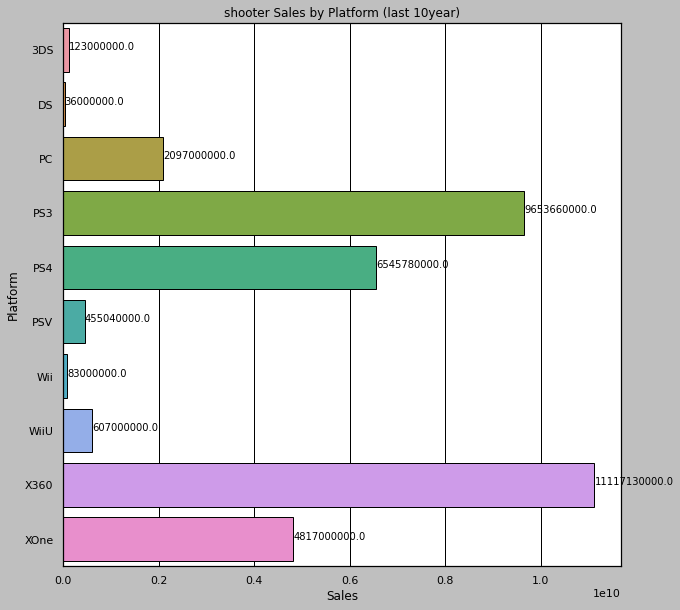

In [120]:
#최근 10년 슈터장르의 플랫폼별 출고량
df_shooter_platform = df_shooter.groupby(['Platform'])['Total_Sales'].sum().reset_index()
platform = df_shooter_platform['Platform'].values
plt.figure(figsize=(10, 10))
df_shooter_platform_sales = sns.barplot(x ='Total_Sales', y='Platform', data=df_shooter_platform)
cnt = 0
for value in df_shooter_platform['Total_Sales']:
    df_shooter_platform_sales.text(x=value + 5, y=cnt, s=str(round(value,2)),
            color='black', size=10)
    cnt+=1
plt.title('shooter Sales by Platform (last 10year)')
plt.xlabel('Sales')
plt.ylabel('Platform')
plt.show()

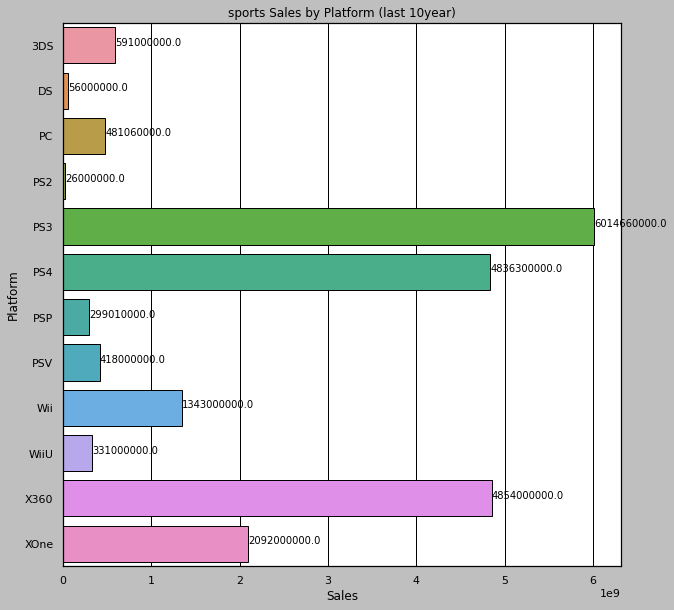

In [121]:
#최근 10년 스포츠장르의 플랫폼별 출고량
df_sports_platform = df_sports.groupby(['Platform'])['Total_Sales'].sum().reset_index()
platform = df_sports_platform['Platform'].values
plt.figure(figsize=(10, 10))
df_sports_platform_sales = sns.barplot(x ='Total_Sales', y='Platform', data=df_sports_platform)
cnt = 0
for value in df_sports_platform['Total_Sales']:
    df_sports_platform_sales.text(x=value + 5, y=cnt, s=str(round(value,2)),
            color='black', size=10)
    cnt+=1
plt.title('sports Sales by Platform (last 10year)')
plt.xlabel('Sales')
plt.ylabel('Platform')
plt.show()

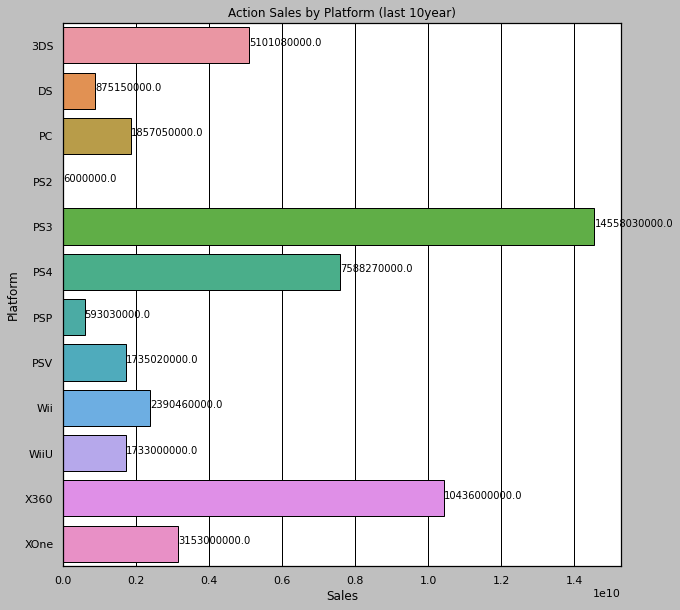

In [122]:
#최근 10년 액션장르의 플랫폼별 출고량
df_action_platform = df_action.groupby(['Platform'])['Total_Sales'].sum().reset_index()
platform = df_action_platform['Platform'].values
plt.figure(figsize=(10, 10))
df_action_platform_sales = sns.barplot(x ='Total_Sales', y='Platform', data=df_action_platform)
cnt = 0

for value in df_action_platform['Total_Sales']:
    df_action_platform_sales.text(x=value + 5, y=cnt, s=str(round(value,2)),
            color='black', size=10)
    cnt+=1
    
plt.title('Action Sales by Platform (last 10year)')
plt.xlabel('Sales')
plt.ylabel('Platform')
plt.show()